# Density Based clustering - DBSCAN

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("dataset/CS1-dataset.csv",sep='\t',decimal=",",index_col=0)
df.head()

,CustomerID,I,Iu,Imax,E,PIL,Mb,Ts,MeanD,MaxD,MinD,EDate
0,17850.0,1707,21,12,4.335643,2.567,156.860294,5333.25,0.000000,0.0,0.0,0.000000
1,13047.0,1386,105,32,6.503112,2.567,356.232222,3206.09,35.000000,70.0,0.0,2.226424
2,12583.0,4992,113,360,6.504979,2.752,442.969333,6644.54,24.266667,72.0,0.0,2.235084
3,13748.0,439,24,80,4.494680,2.567,189.650000,948.25,55.400000,136.0,0.0,1.177965
4,15100.0,80,1,32,0.000000,2.567,292.000000,876.00,13.000000,32.0,0.0,0.918296


## Transformation

In [2]:
#Eliminiamo il client id null per adesso poi non ci sarà
df=df[df["CustomerID"].notnull()]
del df['CustomerID']
df.head()

,I,Iu,Imax,E,PIL,Mb,Ts,MeanD,MaxD,MinD,EDate
0,1707,21,12,4.335643,2.567,156.860294,5333.25,0.000000,0.0,0.0,0.000000
1,1386,105,32,6.503112,2.567,356.232222,3206.09,35.000000,70.0,0.0,2.226424
2,4992,113,360,6.504979,2.752,442.969333,6644.54,24.266667,72.0,0.0,2.235084
3,439,24,80,4.494680,2.567,189.650000,948.25,55.400000,136.0,0.0,1.177965
4,80,1,32,0.000000,2.567,292.000000,876.00,13.000000,32.0,0.0,0.918296


In [3]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
#StandardScaler corrisponde allo z scaler
scaler = MinMaxScaler()
X = scaler.fit_transform(df.values)
print(X[:5])

[[8.67950446e-03 1.14025086e-02 2.29214420e-03 4.18976976e-01
  1.67671736e-01 5.78415905e-03 1.91294402e-02 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [7.04637379e-03 5.92930445e-02 6.45967910e-03 6.28431304e-01
  1.67671736e-01 1.31542413e-02 1.14991293e-02 1.91780822e-01
  1.91780822e-01 0.00000000e+00 9.61982496e-01]
 [2.53923838e-02 6.38540479e-02 7.48072515e-02 6.28611740e-01
  1.79798112e-01 1.63606087e-02 2.38331533e-02 1.32968037e-01
  1.97260274e-01 0.00000000e+00 9.65724206e-01]
 [2.22838391e-03 1.31128848e-02 1.64617629e-02 4.34345594e-01
  1.67671736e-01 6.99627969e-03 3.40005760e-03 3.03561644e-01
  3.72602740e-01 0.00000000e+00 5.08969615e-01]
 [4.01923126e-04 0.00000000e+00 6.45967910e-03 0.00000000e+00
  1.67671736e-01 1.07798009e-02 3.14089047e-03 7.12328767e-02
  8.76712329e-02 0.00000000e+00 3.96772868e-01]]


In [4]:
#imports
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn import metrics

In [5]:
dbscan = DBSCAN(eps=0.15, min_samples=3)
dbscan.fit(X)

DBSCAN(algorithm='auto', eps=0.15, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=3, n_jobs=None, p=None)

In [6]:
dbscan.labels_[:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [7]:
np.unique(dbscan.labels_, return_counts=True)

(array([-1,  0,  1,  2,  3], dtype=int64),
 array([  82, 5482,    3,    4,    4], dtype=int64))

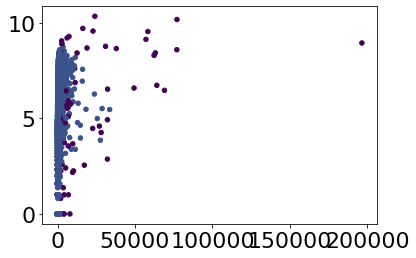

In [8]:
plt.scatter(df['I'], df['E'], c=dbscan.labels_, s=20)
plt.tick_params(axis='both', which='major', labelsize=22)
plt.show()

## Clustering Validation

In [9]:
print('Silhouette %s' % silhouette_score(X, dbscan.labels_))

Silhouette 0.13443626129815064


In [10]:
from scipy.spatial.distance import pdist, squareform

In [11]:
dist = pdist(X, 'euclidean') #pair wise distance
print (dist)
dist = squareform(dist) #distance matrix given the vector dist
print()
print(dist)

[1.02238314 1.02065276 0.70054475 ... 0.18442352 0.08292434 0.15803382]

[[0.         1.02238314 1.02065276 ... 0.06479215 0.2317378  0.11136134]
 [1.02238314 0.         0.09402781 ... 1.01546458 1.0007169  1.01033824]
 [1.02065276 0.09402781 0.         ... 1.01335407 0.99853937 1.00779189]
 ...
 [0.06479215 1.01546458 1.01335407 ... 0.         0.18442352 0.08292434]
 [0.2317378  1.0007169  0.99853937 ... 0.18442352 0.         0.15803382]
 [0.11136134 1.01033824 1.00779189 ... 0.08292434 0.15803382 0.        ]]


In [12]:
k = 5
kth_distances = list()
for d in dist:
    index_kth_distance = np.argsort(d)[k]
    kth_distances.append(d[index_kth_distance])

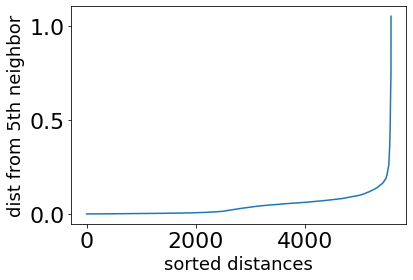

In [13]:
plt.plot(range(0, len(kth_distances)), sorted(kth_distances))
plt.ylabel('dist from %sth neighbor' % k, fontsize=18)
plt.xlabel('sorted distances', fontsize=18)
plt.tick_params(axis='both', which='major', labelsize=22)
plt.show()